In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import geopandas as gpd
from shapely import wkt

In [2]:
df_arbolado = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')
df_arbolado.head()

C:\Users\Javo\AppData\Local\Temp\ipykernel_18536\3279779690.py:1: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_arbolado = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


- Ceibo: Erythrina crista-galli
- Jacarandá: Jacaranda mimosifolia
- Palo borracho: Ceiba speciosa
- Tipa: Tipuana tipu
- Timbó: Enterolobium contortisiliquum
- Ibirá-pitá: Peltophorum dubium
- Guarán -guarán: Tecoma stans
- Aliso de río: Tessaria integrifolia (este no esta en el de arbolado lineal)
- Sauce criollo: Salix humboldtiana
- Aguaribay: Schinus molle
- Curupí: Sapium haematospermum
- Ombú: Phytolacca dioica
- Fumo Bravo: Solanum granulosum-leprosum
- Lapacho: Handroanthus impetiginosus

In [3]:
especies_nativas = {
    "Ceibo": "Erythrina crista-galli",
    "Jacarandá": "Jacaranda mimosifolia", 
    "Palo borracho": "Ceiba speciosa", 
    "Tipa": "Tipuana tipu",
    "Timbó": "Enterolobium contortisiliquum", 
    "Ibirá-pitá": "Peltophorum dubium", 
    "Guarán -guarán": "Tecoma stans", 
    "Sauce criollo": "Salix humboldtiana",
    "Aguaribay": "Schinus molle", 
    "Curupí": "Sapium haematospermum", 
    "Ombú": "Phytolacca dioica",
    "Fumo Bravo": "Solanum granulosum-leprosum", 
    "Lapacho": "Handroanthus impetiginosus"
}
df_arbolado_nativos = df_arbolado[df_arbolado["nombre_cientifico"].isin(especies_nativas.values())]

Jacaranda mimosifolia         13872
Tipuana tipu                   9330
Ceiba speciosa                 1796
Handroanthus impetiginosus     1365
Tecoma stans                    822
Erythrina crista-galli          618
Peltophorum dubium              604
Name: nombre_cientifico, dtype: int64


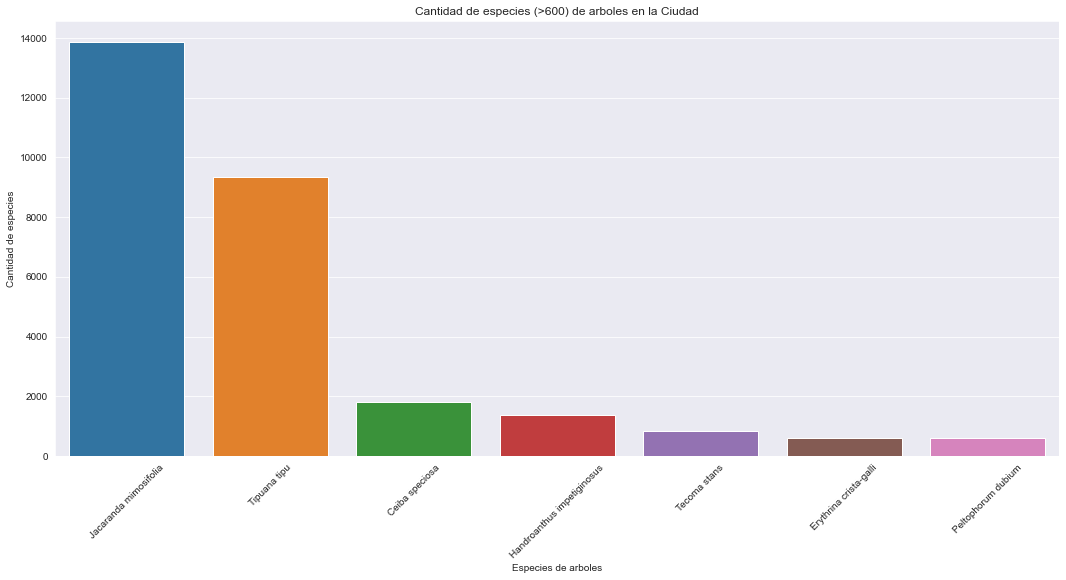

In [4]:
df_arboles_count = df_arbolado_nativos["nombre_cientifico"].value_counts()
print(df_arboles_count[:7])

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x=df_arboles_count[:7].index, y=df_arboles_count[:7], ax=ax)
# ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
ax.set(ylabel='Cantidad de especies', xlabel='Especies de arboles', title="Cantidad de especies (>600) de arboles en la Ciudad")
plt.xticks(rotation=45);

In [5]:
df_arbolado_nativos = df_arbolado_nativos[df_arbolado_nativos["nombre_cientifico"].isin(df_arboles_count[:7].index)]
df_arbolado_nativos.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0
7,-58.373356,-34.594871,31864,Lineal,1,NaN,Reconquista,1100.0,1126.0,RECONQUISTA 1126,En frente,Jacaranda mimosifolia,NaN,Ocupada,NaN,A nivel,8.0,3.0
8,-58.380812,-34.591559,31354,Lineal,1,NaN,Arroyo,900.0,940.0,ARROYO 940,Exacta,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,38.0,15.0


In [6]:
df_arbolado_nativos["estado_plantera"].unique()

array(['Ocupada', 'Sobreocupada', 'Cerrada', 'Parcialmente cerrada',
       'sobreocupada', 'Sobreocupada parc. cerrada', 'Ocupada ',
       'Cantero ocupado', 'Vacía'], dtype=object)

In [7]:
df_arbolado_nativos["ubicacion_plantera"].unique()

array(['Regular', nan, 'Ochava', 'Fuera de línea', 'Regular ', 'regular',
       'Ocupada', 'O', 'Cantero Grande', 'ochava',
       'Fuera de Línea, Ochava'], dtype=object)

In [8]:
df_arbolado_nativos["ubicacion"].unique()

array([nan, 'Exacta', 'LA', 'En frente', 'LD', 'LA2', 'LD2', 'LD3', 'LD1',
       'LA1', 'En frente - LA', 'En frente - Exacta', 'LA 18', 'LA 23',
       'LA 24', 'LA 25', 'LA 26', 'LA 27', 'LA3', 'LD4', 'LD7', 'LA5',
       'LA4', 'LA6', 'LA7', 'LA8', 'LA9', 'LA10', 'LA11', 'LA12', 'LA13',
       'LA14', 'LA16', 'LA17', 'LA18', 'LA19', 'LA21', 'LA22', 'LA23',
       'LA24', 'LA25', 'LA26', 'LA27', 'LA28', 'LA29', 'LA15', 'LD5',
       'LD 1', 'LA 2', 'LA 1', 'LD 4', 'LD 2', 'LA 3', 'LA 4', 'LA 5',
       'LA 6', 'LD9', 'LD8', 'LD6', 'LD10', 'LD11', 'LD13', 'LD14',
       'LD15', 'LD17', 'LD18', 'LD19', 'LD20', 'LD21', 'LD22', 'LD23',
       'LD24', 'LD25', 'LD26', 'LD27', 'LD28', 'LD29', 'LD30', 'LD31',
       'LD32', 'LD33', 'LD34', 'LD35', 'LD36', 'LD37', 'LD38', 'LD39',
       'LD40', 'LD41', 'LD42', 'LD43', 'LD44', 'LD45', 'LD46', 'LA2 ',
       'EX', 'LD 3', 'LD 8', 'LD 9', 'LD 19', 'LD 20', 'LD 22', 'LD 24',
       'LD 25', 'LD 29', 'LD 30', 'LD 31', 'LD 5', 'LA 10', 'LA 7',
   

In [9]:
# df_arbolado_nativos["tipo_activ"].unique() # deletear
# df_arbolado_nativos["estado_plantera"].unique() # Ver ocupacion y coordenadas con el de abajo
# df_arbolado_nativos["ubicacion_plantera"].unique() # Ojo aca con las ochavas
df_nativos_planteras = df_arbolado_nativos[df_arbolado_nativos["estado_plantera"].isin(['Ocupada', 'Ocupada ', 'Cantero ocupado', 'Sobreocupada', 'sobreocupada', 'Sobreocupada parc. cerrada'])]
df_nativos_planteras = df_nativos_planteras[df_arbolado_nativos["ubicacion_plantera"].isin(['Ochava', 'ochava', 'Fuera de Línea, Ochava'])]
df_nativos_planteras = df_nativos_planteras[df_arbolado_nativos["ubicacion"].isin(['Exacta', 'EX', 'Exacta '])]

C:\Users\Javo\AppData\Local\Temp\ipykernel_18536\3669144712.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nativos_planteras = df_nativos_planteras[df_arbolado_nativos["ubicacion_plantera"].isin(['Ochava', 'ochava', 'Fuera de Línea, Ochava'])]
C:\Users\Javo\AppData\Local\Temp\ipykernel_18536\3669144712.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nativos_planteras = df_nativos_planteras[df_arbolado_nativos["ubicacion"].isin(['Exacta', 'EX', 'Exacta '])]


In [10]:
df_nativos_planteras

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
1553,-58.362705,-34.610519,59737,Lineal,1,NaN,Maizani Azucena,300.0,398.0,"MAIZANI, AZUCENA 398",Exacta,Jacaranda mimosifolia,3.3,Ocupada,Ochava,Bajo nivel,18.0,10.0
2036,-58.382179,-34.605137,61347,Lineal,1,NaN,cerrito,200.0,294.0,CERRITO 294,Exacta,Jacaranda mimosifolia,7.2,Ocupada,Ochava,A nivel,40.0,12.0
2375,-58.375329,-34.596356,62728,Lineal,1,NaN,Florida,900.0,999.0,FLORIDA 999,Exacta,Jacaranda mimosifolia,6,Ocupada,Ochava,Elevada,34.0,11.0
3692,-58.377498,-34.605788,66114,Lineal,1,NaN,"Saenz Peña Roque,Pres. Diagonal Norte Av.",700.0,749.0,"SAENZ PEÑA, ROQUE, PRES. DIAGONAL NORTE AV. 749",Exacta,Jacaranda mimosifolia,4.8,Ocupada,Ochava,A nivel,29.0,9.0
4053,-58.373264,-34.620699,67424,Lineal,1,NaN,Humberto Primo,500.0,523.0,HUMBERTO 1° 523,Exacta,Jacaranda mimosifolia,2,Ocupada,Ochava,A nivel,25.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364807,NaN,NaN,106821,Lineal,13,NaN,Ricchieri Pablo Tte. Gral.,3050.0,3055.0,NaN,Exacta,Jacaranda mimosifolia,4.4,Sobreocupada,Ochava,A nivel,42.0,10.0
365540,-58.462900,-34.541352,396711,Lineal,13,784,Rivadavia Martín Comodoro Av.,1100.0,1600.0,NaN,Exacta,Tipuana tipu,5.6,Ocupada,Ochava,A nivel,91.0,15.0
365888,NaN,NaN,406030,Lineal,13,785,Padre Canavery,1300.0,1300,NaN,Exacta,Tipuana tipu,6,Ocupada,Ochava,A nivel,48.0,12.0
369302,NaN,NaN,245711,Lineal,15,875,Corrientes Av.,6600.0,6600.0,NaN,Exacta,Tipuana tipu,4.8,Ocupada,Ochava,A nivel,62.0,21.0


In [11]:
size=26
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'legend.fontsize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

Jacaranda mimosifolia         287
Tipuana tipu                  211
Ceiba speciosa                 75
Handroanthus impetiginosus     25
Erythrina crista-galli         22
Tecoma stans                   17
Peltophorum dubium             11
Name: nombre_cientifico, dtype: int64


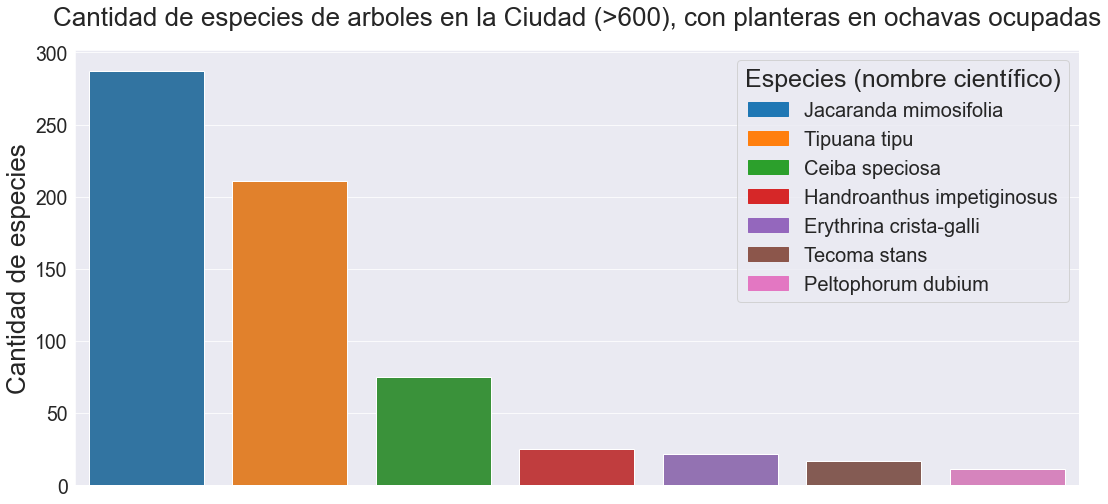

In [12]:
df_nativos_planteras_count = df_nativos_planteras["nombre_cientifico"].value_counts()
print(df_nativos_planteras_count)

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x=df_nativos_planteras_count.index, y=df_nativos_planteras_count, ax=ax)
ax.get_xaxis().set_visible(False)
ax.set(ylabel='Cantidad de especies', xlabel='Especies de arboles', title="Cantidad de especies de arboles en la Ciudad (>600), con planteras en ochavas ocupadas")
patches = [Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in ax.get_xticklabels())]
plt.legend(handles=patches, loc="upper right", title="Especies (nombre científico)", fontsize = '20', title_fontsize = '25')

In [13]:
gdf_arbolado = gpd.GeoDataFrame(df_nativos_planteras, geometry=gpd.points_from_xy(df_nativos_planteras.long, df_nativos_planteras.lat))
gdf_arbolado.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry
1553,-58.362705,-34.610519,59737,Lineal,1,NaN,Maizani Azucena,300.0,398.0,"MAIZANI, AZUCENA 398",Exacta,Jacaranda mimosifolia,3.3,Ocupada,Ochava,Bajo nivel,18.0,10.0,POINT (-58.36271 -34.61052)
2036,-58.382179,-34.605137,61347,Lineal,1,NaN,cerrito,200.0,294.0,CERRITO 294,Exacta,Jacaranda mimosifolia,7.2,Ocupada,Ochava,A nivel,40.0,12.0,POINT (-58.38218 -34.60514)
2375,-58.375329,-34.596356,62728,Lineal,1,NaN,Florida,900.0,999.0,FLORIDA 999,Exacta,Jacaranda mimosifolia,6,Ocupada,Ochava,Elevada,34.0,11.0,POINT (-58.37533 -34.59636)
3692,-58.377498,-34.605788,66114,Lineal,1,NaN,"Saenz Peña Roque,Pres. Diagonal Norte Av.",700.0,749.0,"SAENZ PEÑA, ROQUE, PRES. DIAGONAL NORTE AV. 749",Exacta,Jacaranda mimosifolia,4.8,Ocupada,Ochava,A nivel,29.0,9.0,POINT (-58.37750 -34.60579)
4053,-58.373264,-34.620699,67424,Lineal,1,NaN,Humberto Primo,500.0,523.0,HUMBERTO 1° 523,Exacta,Jacaranda mimosifolia,2,Ocupada,Ochava,A nivel,25.0,6.0,POINT (-58.37326 -34.62070)


In [14]:
df_barrios = pd.read_csv('barrios.csv', sep=";")
df_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,MULTIPOLYGON (((-58.4528200492791 -34.59598865...,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,MULTIPOLYGON (((-58.4655768128541 -34.59655770...,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,MULTIPOLYGON (((-58.4237529813037 -34.59782733...,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,MULTIPOLYGON (((-58.4946097568899 -34.61486523...,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,MULTIPOLYGON (((-58.4128700313088 -34.61411625...,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


In [15]:
df_barrios['WKT'] = df_barrios["WKT"].apply(wkt.loads)
gdf_barrios = gpd.GeoDataFrame(df_barrios, geometry='WKT')

In [16]:
gdf_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...",PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...",VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


In [17]:
size=26
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'legend.fontsize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

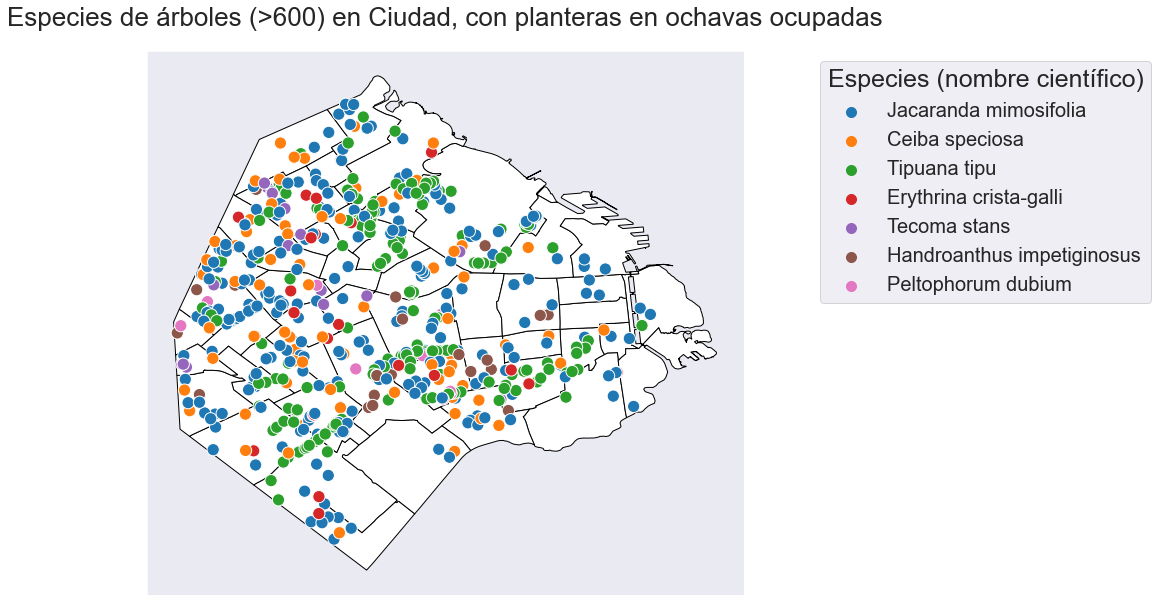

In [18]:
ax_barrios = gdf_barrios.plot(color="white", edgecolor="black", figsize=(40, 10))
sns.scatterplot(data=gdf_arbolado, x="long", y="lat", ax=ax_barrios, hue="nombre_cientifico", s=150)
ax_barrios.get_xaxis().set_visible(False)
ax_barrios.get_yaxis().set_visible(False)
ax_barrios.set(title="Especies de árboles (>600) en Ciudad, con planteras en ochavas ocupadas")
lgnd = plt.legend(loc="upper right", title="Especies (nombre científico)", fontsize = '20', title_fontsize = '25', bbox_to_anchor=(1.7, 1))
for i in range(7):
    lgnd.legendHandles[i]._sizes = [100]